In [14]:
import numpy as np
from mpl_toolkits.mplot3d.axes3d import Axes3D
import matplotlib.pyplot as plt

def generate_sphere(r):
    step = 1e-1
    phi = np.arange(0, 2 * np.pi, step)
    theta = np.arange(-np.pi, np.pi, step)

    A = np.zeros((phi.size * theta.size, 3))

    i = 0
    for p in phi:
        for t in theta:
            A[i, 0] = r * np.cos(p) * np.cos(t)
            A[i, 1] = r * np.sin(p) * np.cos(t)
            A[i, 2] = r * np.sin(t)
            i += 1
    return A
def get_plot():
    fig = plt.figure()
    ax = fig.gca(projection="3d")
    return fig, ax

def plot_3d(A, ax=None, show=True):
    if ax is None:
        fig, ax = get_plot()
    ax.scatter(A[:, 0], A[:, 1], A[:, 2])
    if show:
        plt.show()


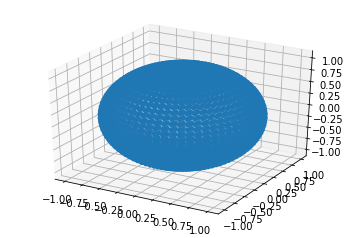

In [15]:
%matplotlib tk
%matplotlib inline
S= generate_sphere(1)
plot_3d(S)

In [16]:
A1 = np.random.random_sample((3, 3)) * np.random.randint(1, 5)

# n = S[:, 0].size
# S2 = np.zeros((n, 3))
# 
# for i in range(n):
#     res = A1.dot(S[i, :])
#     S2[i, :] = res

# S2 = A1.dot(S.transpose()).transpose()
S2= S.dot(A1)

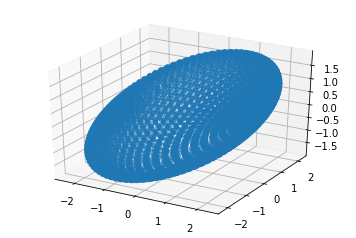

In [17]:
%matplotlib inline
plot_3d(S2)

In [18]:
U,s,V_trans = np.linalg.svd(A1,full_matrices=True)
sigma=np.eye(3)*s

In [19]:
A1-U.dot(sigma.dot(V_trans))

array([[  6.66133815e-16,   0.00000000e+00,  -1.11022302e-16],
       [  0.00000000e+00,   1.77635684e-15,   1.11022302e-15],
       [  6.66133815e-16,  -1.38777878e-16,  -3.88578059e-16]])

In [20]:
%matplotlib --list

Available matplotlib backends: ['tk', 'gtk', 'gtk3', 'wx', 'qt', 'qt4', 'qt5', 'osx', 'nbagg', 'notebook', 'agg', 'inline', 'ipympl']


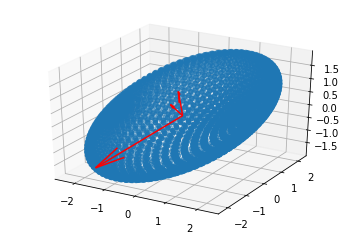

In [21]:
# % matplotlib tk
fig, ax = get_plot()
plot_3d(S2, ax, show=False)
u_scaled=U.dot(sigma)
z=[0]
u_scaled[:,[1,2]]=u_scaled[:,[2,1]]
ax.quiver(z, z, z, u_scaled[0,:], u_scaled[1,:], u_scaled[2,:], color="red")
plt.show()
